<a href="https://colab.research.google.com/github/MrBaten/AutoML/blob/main/inception__v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

In [10]:
import keras,os
import numpy as np
import tensorflow as tf
import cv2
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential , load_model , Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, GlobalAveragePooling2D 
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from tensorflow.keras import applications
from tensorflow.keras import optimizers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import load_img, img_to_array
from keras.layers import BatchNormalization
from glob import glob
# Step 1: Prepare your dataset
# Assume you have a directory with images and corresponding labels

with tf.device('/gpu:0'):
    pass
    
train_dir = '/content/drive/My Drive/pest/train'
valid_dir = '/content/drive/My Drive/pest/test'

In [11]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)

In [12]:
batch_size = 256
train_datagen = ImageDataGenerator(rescale=1/255,
                  shear_range=0.3,
                  horizontal_flip=True,
                  zoom_range=0.3
                  )
val_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(224,224),
                batch_size=batch_size,
                color_mode="rgb",
                class_mode="categorical"
                )

val_generator = val_datagen.flow_from_directory(
                valid_dir,
                target_size=(224,224),
                batch_size=batch_size,
                color_mode="rgb",
                class_mode="categorical"
                )

Found 2704 images belonging to 9 classes.
Found 450 images belonging to 9 classes.


In [13]:
IncV3 = InceptionV3(include_top = False, weights = "imagenet",input_shape = (224,224,3))

In [17]:
className = glob(train_dir + "/*")
NumberofClass = len(className)
print("NumberofClass:", NumberofClass)

NumberofClass: 9


In [19]:
model = Sequential()

model.add(IncV3)
    
for layer in model.layers:
    layer.trainable = False


model.add(Flatten())

model.add(Dense(units = 2048, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = NumberofClass, activation = "softmax"))


In [20]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [21]:
history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = 5,
                    batch_size = batch_size)

Epoch 1/5
11/11 [==============================] - 1258s 111s/step - loss: 70.3712 - accuracy: 0.3110 - val_loss: 13.1965 - val_accuracy: 0.5800
Epoch 2/5
11/11 [==============================] - 399s 37s/step - loss: 9.1782 - accuracy: 0.6206 - val_loss: 2.3113 - val_accuracy: 0.7489
Epoch 3/5
11/11 [==============================] - 400s 37s/step - loss: 2.0823 - accuracy: 0.7696 - val_loss: 0.6187 - val_accuracy: 0.8733
Epoch 4/5
11/11 [==============================] - 392s 35s/step - loss: 0.5008 - accuracy: 0.8635 - val_loss: 0.2419 - val_accuracy: 0.9222
Epoch 5/5
11/11 [==============================] - 383s 35s/step - loss: 0.3236 - accuracy: 0.8931 - val_loss: 0.2102 - val_accuracy: 0.9444


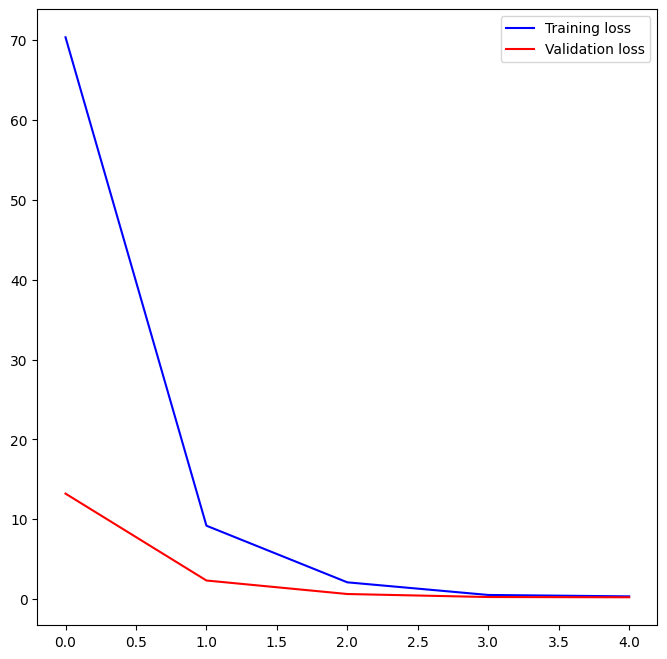

<Figure size 640x480 with 0 Axes>

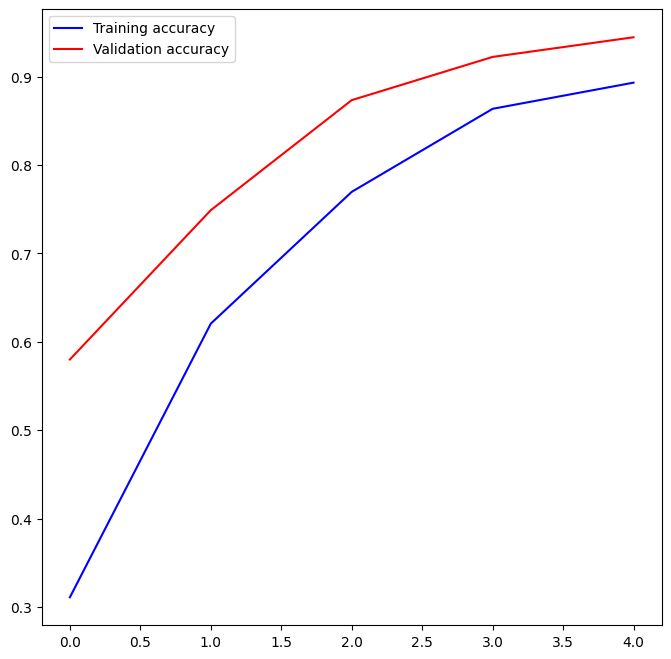

In [22]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend()
plt.show()